<a href="https://colab.research.google.com/github/sergiomora03/AdvancedTopicsAnalytics/blob/main/notebooks/DeepLearningTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Species with Tensorflow ⚡
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

1.   Id
2.   SepalLengthCm
3.   SepalWidthCm
4.   PetalLengthCm
5.   PetalWidthCm
6.   Species

In [1]:
!pip install livelossplot

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

In [3]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
X = iris.data
y = iris.target

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.nn import relu, softmax
from tensorflow.keras.regularizers import l1_l2, l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import clear_session
from livelossplot import PlotLossesKeras

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
scaler = StandardScaler()

In [10]:
y = to_categorical(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## MLP

In [13]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation=relu))
model.add(Dense(3, activation=softmax))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

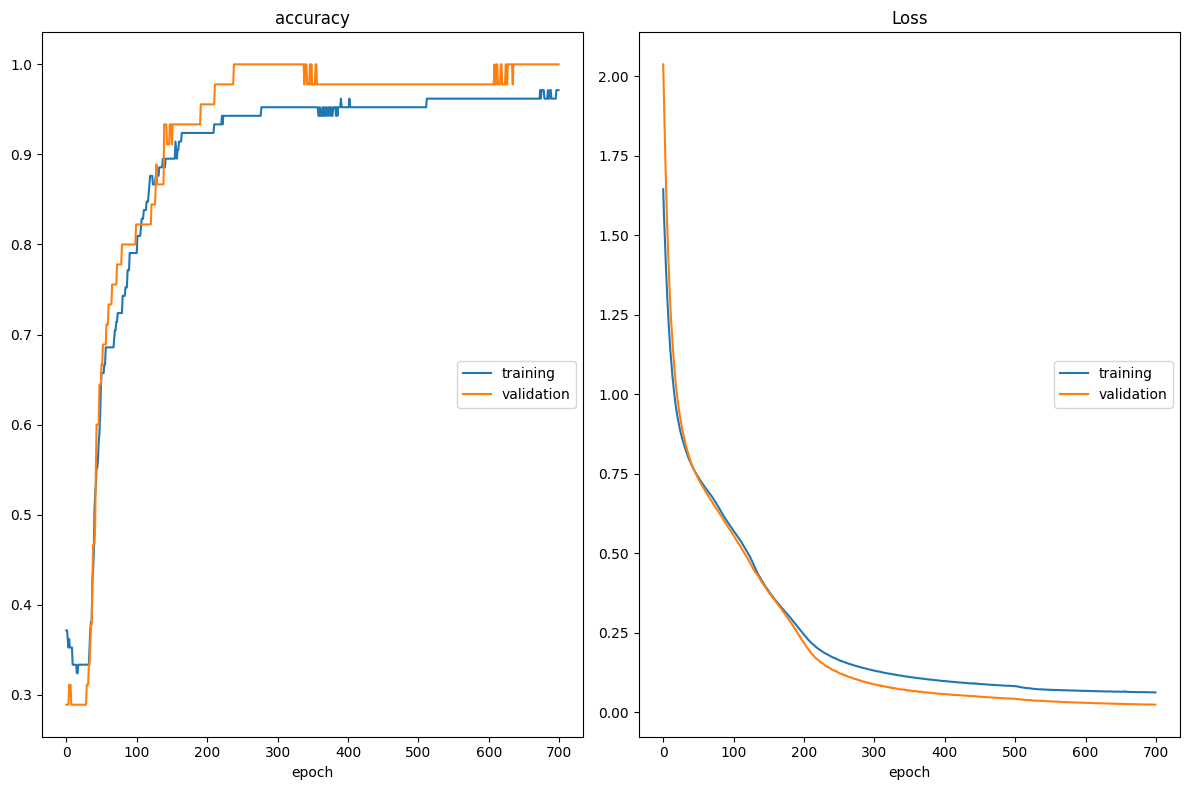

accuracy
	training         	 (min:    0.324, max:    0.971, cur:    0.971)
	validation       	 (min:    0.289, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.062, max:    1.645, cur:    0.062)
	validation       	 (min:    0.024, max:    2.038, cur:    0.024)
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9818 - loss: 0.0466 - val_accuracy: 1.0000 - val_loss: 0.0238


In [18]:
iris_model = model.fit(
    X_train, y_train,
    validation_data=[X_test, y_test],
    batch_size=7, epochs=700, verbose=1,
    callbacks=[PlotLossesKeras()]
)

In [19]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 467ms/step - accuracy: 1.0000 - loss: 0.0265


[0.023847389966249466, 1.0]

In [20]:
clear_session()

## Multi-layer model...


In [13]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation=relu))
model.add(Dense(7, activation=relu))
model.add(Dense(5, activation=relu))
model.add(Dense(3, activation=softmax))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              77 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185 (740.00 B)

 Trainable params: 185 (740.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

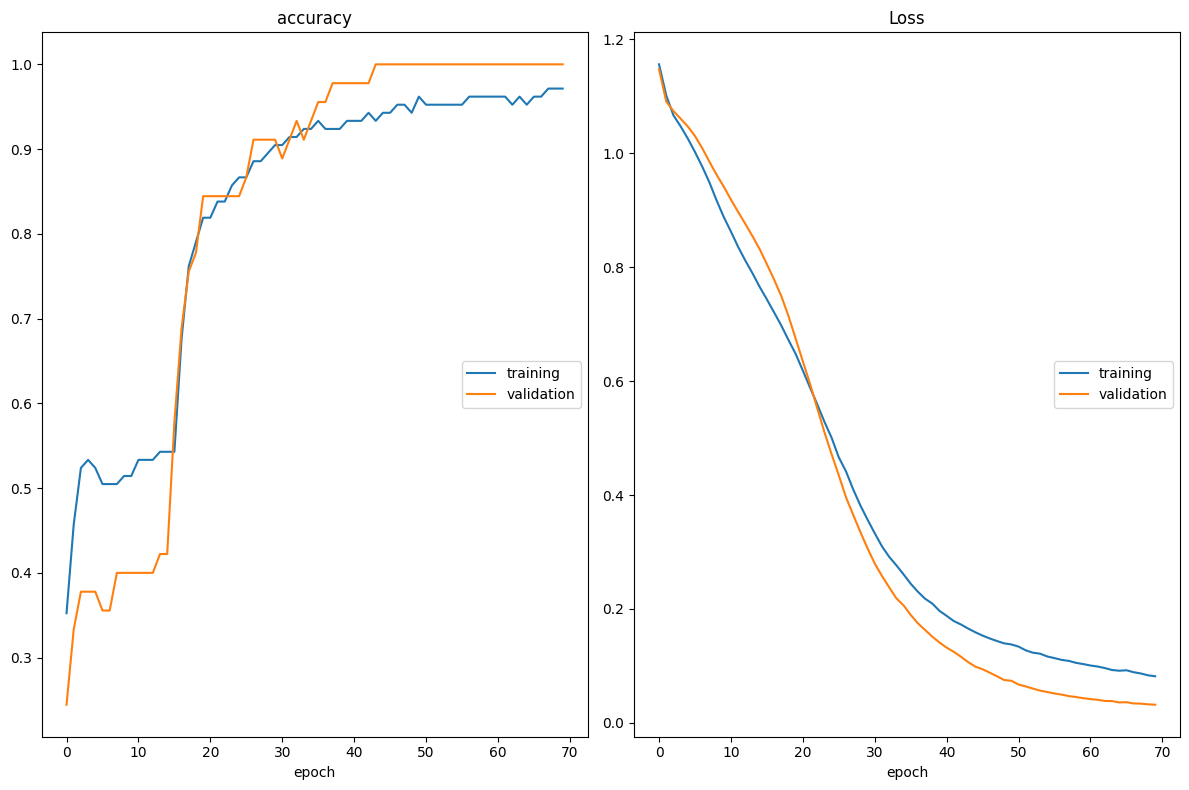

accuracy
	training         	 (min:    0.352, max:    0.971, cur:    0.971)
	validation       	 (min:    0.244, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.082, max:    1.156, cur:    0.082)
	validation       	 (min:    0.032, max:    1.148, cur:    0.032)
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9638 - loss: 0.1018 - val_accuracy: 1.0000 - val_loss: 0.0318


In [16]:
iris_model = model.fit(
    X_train, y_train,
    validation_data=[X_test, y_test],
    batch_size=7, epochs=70, verbose=1,
    callbacks=[PlotLossesKeras()])

In [17]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 427ms/step - accuracy: 1.0000 - loss: 0.0329


[0.03178303316235542, 1.0]

In [18]:
clear_session()

## With BatchNormalization and Dropout

In [19]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation=relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(7, activation=relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(5, activation=relu))
model.add(Dense(3, activation=softmax))

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              77 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7)                   │              28 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253 (1012.00 B)

 Trainable params: 219 (876.00 B)

 Non-trainable params: 34 (136.00 B)

In [21]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

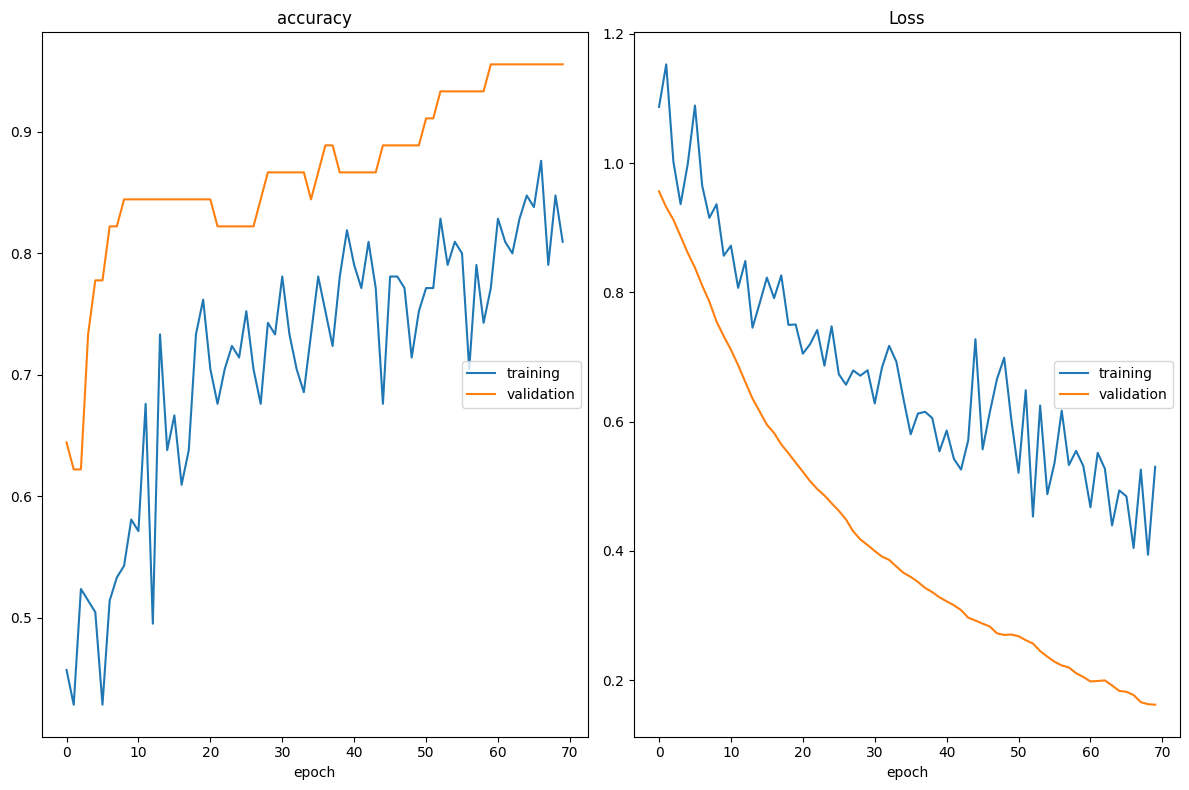

accuracy
	training         	 (min:    0.429, max:    0.876, cur:    0.810)
	validation       	 (min:    0.622, max:    0.956, cur:    0.956)
Loss
	training         	 (min:    0.394, max:    1.153, cur:    0.530)
	validation       	 (min:    0.162, max:    0.956, cur:    0.162)
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.8389 - loss: 0.5118 - val_accuracy: 0.9556 - val_loss: 0.1620


In [22]:
iris_model = model.fit(
    X_train, y_train,
    validation_data=[X_test, y_test],
    batch_size=7, epochs=70, verbose=1,
    callbacks=[PlotLossesKeras()])

In [23]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step - accuracy: 0.9600 - loss: 0.1544


[0.16197961568832397, 0.9555555582046509]

In [24]:
clear_session()

## Kernel init and Kernel regularizer

In [13]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation=relu, kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(7, activation=relu, kernel_initializer='he_normal', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(5, activation=relu, kernel_initializer='he_normal', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(3, activation=softmax))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              77 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7)                   │              28 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253 (1012.00 B)

 Trainable params: 219 (876.00 B)

 Non-trainable params: 34 (136.00 B)

In [15]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

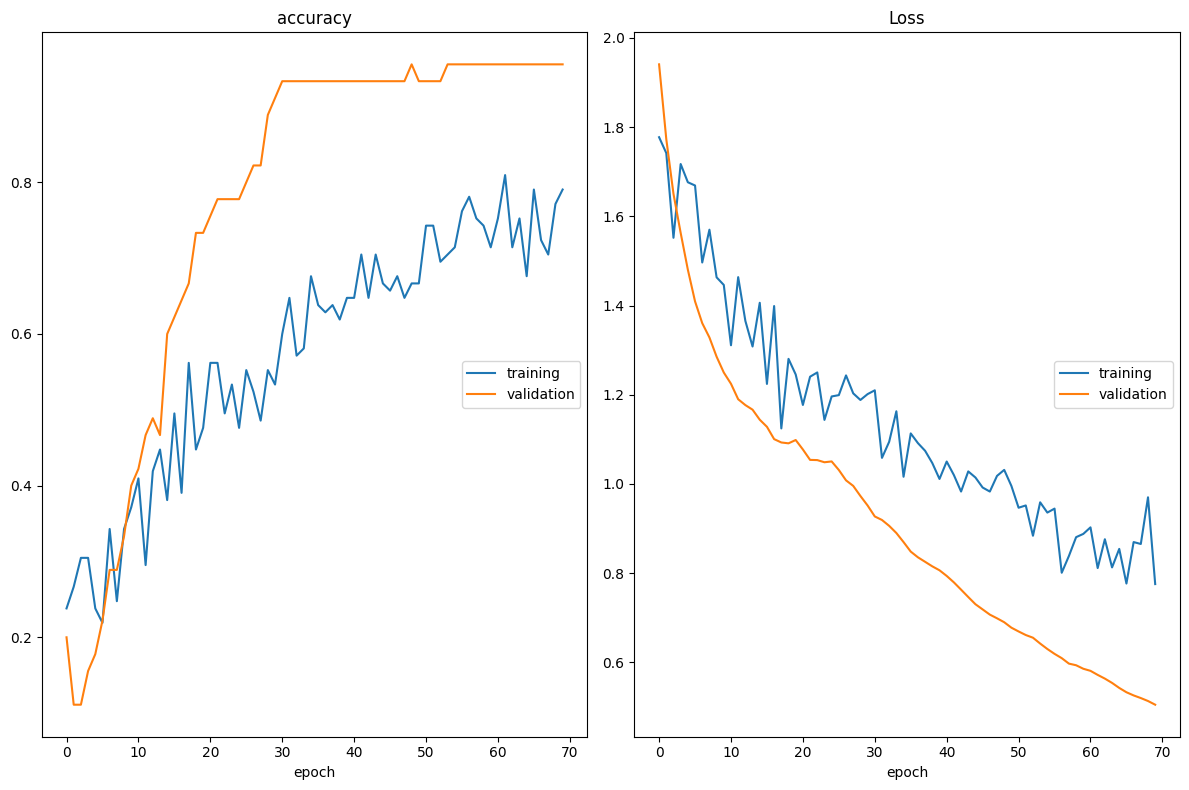

accuracy
	training         	 (min:    0.219, max:    0.810, cur:    0.790)
	validation       	 (min:    0.111, max:    0.956, cur:    0.956)
Loss
	training         	 (min:    0.775, max:    1.777, cur:    0.775)
	validation       	 (min:    0.505, max:    1.941, cur:    0.505)
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.7862 - loss: 0.7977 - val_accuracy: 0.9556 - val_loss: 0.5051


In [16]:
iris_model = model.fit(
    X_train, y_train,
    validation_data=[X_test, y_test],
    batch_size=7, epochs=70, verbose=1,
    callbacks=[PlotLossesKeras()])

In [17]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9600 - loss: 0.4988 


[0.5050605535507202, 0.9555555582046509]